### Problem Statement: Technova Case Study

TechNova Solutions, a B2B software company, has been experiencing fluctuating customer engagement levels. The company wants to analyze data from their sales calls to improve customer retention and identify upselling opportunities.

In this implementation, I am using the provided data contains the last 6 months of sales calls and customer interactions.


The following are assumptions are made about the descriptions what each column in the data represents (since no prior details were given):

* **call_id**: Unique identifier for each sales call.
* **date**: When the sales call took place.
* **customer_id**: Unique identifier for each customer.
* **customer_size**: Size of the customer’s business (e.g., Small, Medium, Large).
* **industry**: Industry in which the customer operates (e.g., Finance, Healthcare, etc).
* **product**: Specific software product discussed during the call.
* **call_duration**: Length of the call, (in minutes).
* **sentiment_score**: Score indicating how positive or negative the customer’s attitude was during the call, (ranging from negative to positive).
* **followup_scheduled**: Whether a follow-up meeting or call was scheduled after the current call (Yes or No).
* **issues_raised**: Number of issues or problems the customer mentioned during the call.
* **feature_requests**: Number of new features the customer asked for.
* **competitor_mentioned**: Whether the customer mentioned a competitor during the call (Yes or No).
* **upsell_opportunity**: Whether there was a chance to sell additional products or services (Yes or No).
* **churn_risk**: The likelihood that the customer might stop doing business with TechNova (Low, Medium, High).

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
# Using `pd.read_csv` function to load data into the Jupyter Notebook
data = pd.read_csv("/technova_sales_data.csv")
# Using `.sample()` function to have a first look over data with random 5 samples
data.sample(5)

,call_id,date,customer_id,customer_size,industry,product,call_duration,sentiment_score,followup_scheduled,issues_raised,feature_requests,competitor_mentioned,upsell_opportunity,churn_risk
11573,11574,2023-05-10,C11574,Small,Education,CRM Basic,48,-0.13,Yes,3,1,No,Medium,Medium
44731,44732,2023-08-10,C44732,Large,Technology,Analytics Pro,45,0.43,Yes,1,1,No,Low,Low
32501,32502,2023-08-27,C32502,Large,Technology,ERP Lite,52,0.57,Yes,3,0,Yes,Low,Medium
46149,46150,2023-05-24,C46150,Large,Education,Analytics Pro,44,0.66,Yes,0,3,Yes,Medium,Medium
41789,41790,2023-05-15,C41790,Medium,Retail,CRM Basic,58,-0.29,Yes,3,2,No,Medium,Medium


In [3]:
# Using `.info()` to have a comprehensive information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   call_id               100000 non-null  int64  
 1   date                  100000 non-null  object 
 2   customer_id           100000 non-null  object 
 3   customer_size         100000 non-null  object 
 4   industry              100000 non-null  object 
 5   product               100000 non-null  object 
 6   call_duration         100000 non-null  int64  
 7   sentiment_score       100000 non-null  float64
 8   followup_scheduled    100000 non-null  object 
 9   issues_raised         100000 non-null  int64  
 10  feature_requests      100000 non-null  int64  
 11  competitor_mentioned  100000 non-null  object 
 12  upsell_opportunity    100000 non-null  object 
 13  churn_risk            100000 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 10.7

This comprehensive overview of data suggest that, the dataframe have 13 columns in total, with: 1 column as `float64`, 4 columns as `int64` and 9 columns are `objects`, with 100000 entries. The total memory consumption is 10.7+ MB.

**Conclusions**:

This dataset require some changes for the perfect datatypes for better analysis:

* Changing the `date` datatype from `object` to `datatime` datatype.
* Changing the `float64` and `int64` into appropriate range to reduce memory usage.


### Understanding Numerical Data

In [4]:
# Using `.describe()` to get the statistical description of the data
data.describe()

,call_id,call_duration,sentiment_score,issues_raised,feature_requests
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,39.967990,0.317637,1.500950,1.502590
std,28867.657797,13.989937,0.403542,1.117216,1.119529
min,1.000000,15.000000,-0.500000,0.000000,0.000000
25%,25000.750000,28.000000,-0.010000,1.000000,1.000000
50%,50000.500000,40.000000,0.390000,2.000000,1.000000
75%,75000.250000,51.000000,0.650000,2.000000,3.000000
max,100000.000000,75.000000,1.000000,3.000000,3.000000


**Conclusions**:

* **Call Duration**:  The median (50th percentile) `call_duration` lasts for 40 mins (assuming the `call_duration` is in minutes), further suggesting that exactly 50% of the people stay on the call for 40 minutes or less, and the other 50% stay for more than 40 minutes.
* **Sentiment Score**: The minimum `sentiment_score` is -0.5 and maximum is 1, this range seems to be weird, we can plot the distribution of this feature to understand the presence of the outliers or unusual patterns, if any.
* **Issues Raised**: For `issues_raised`, the 75th percentile is 2.0, meaning that 75% of people raised 2 or fewer issues, suggesting that the majority raised a maximum of 2 issues.
* **Feature Requests**: For `feature_requests`, the 75th percentile is 3.0, indicating that 75% of people made 3 or fewer feature requests.
* Lastly, all these statistical features are occuping uncessary memory space. If I can change the datatype of this data, then we can get reduce the memory consumption by this data.

### Understanding Categorical Data

In [5]:
# Filtering object datatypes
categorical_columns = data.select_dtypes(include='object').columns[1:]

# Looping through each categorical column to print its unique values
for column in categorical_columns:
  print(f"Column Name: {column}")
  print(data[column].value_counts())
  print("\n")

Column Name: customer_id
customer_id
C001       1
C66651     1
C66673     1
C66672     1
C66671     1
          ..
C33332     1
C33331     1
C33330     1
C33329     1
C100000    1
Name: count, Length: 100000, dtype: int64


Column Name: customer_size
customer_size
Large     33415
Small     33339
Medium    33246
Name: count, dtype: int64


Column Name: industry
industry
Finance          16767
Retail           16739
Manufacturing    16727
Education        16625
Technology       16611
Healthcare       16531
Name: count, dtype: int64


Column Name: product
product
ERP Lite           14388
Security Suite     14360
CRM Pro            14299
CRM Basic          14261
Analytics Basic    14258
ERP Enterprise     14227
Analytics Pro      14207
Name: count, dtype: int64


Column Name: followup_scheduled
followup_scheduled
Yes    60077
No     39923
Name: count, dtype: int64


Column Name: competitor_mentioned
competitor_mentioned
No     70072
Yes    29928
Name: count, dtype: int64


Column Name: ups

### Data Cleaning and Pre-Processing

In [6]:
# Converting `date` to datetime datatype
data['date'] = pd.to_datetime(data['date'])

### Optimizing Memory
By changing the datatypes while preserving the integrity of the data.


#### **Column Analysis (as per above `.describe()` function) and Suggested Data Types**

1. `call_id`:

  * **Range**: 1 to 100,000
  * **Suggested Type**: int32 (since int32 can handle values from -2,147,483,648 to 2,147,483,647, this is more than enough for 100,000 values).

2. `call_duration`:

  * **Range**: 15 to 75
  * **Suggested Type**: int8 (since int8 can handle values from -128 to 127, which is sufficient for this range).

3. `sentiment_score`:

  * **Range**: -0.5 to 1.0
  * **Suggested Type**: float32 (to accommodate decimal values, and float32 reduces memory usage compared to float64).

4. `issues_raised`:

  * **Range**: 0 to 3
  * **Suggested Type**: int8 (since int8 can handle values from -128 to 127, which is sufficient for this range).

5. `feature_requests`:

  * **Range**: 0 to 3
  * **Suggested Type**: int8 (since int8 can handle values from -128 to 127, which is sufficient for this range).

In [7]:
# Using `.astype()` function to convert the data types to appropriate range of values.
data["call_id"] = data["call_id"].astype("int32")
data["call_duration"] = data["call_duration"].astype("int8")
data["sentiment_score"] = data["sentiment_score"].astype("float32")
data["issues_raised"] = data["issues_raised"].astype("int8")
data["feature_requests"] = data["feature_requests"].astype("int8")

In [8]:
# Convert each of these columns to 'category' dtype
data[categorical_columns] = data[categorical_columns].astype('category')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   call_id               100000 non-null  int32         
 1   date                  100000 non-null  datetime64[ns]
 2   customer_id           100000 non-null  category      
 3   customer_size         100000 non-null  category      
 4   industry              100000 non-null  category      
 5   product               100000 non-null  category      
 6   call_duration         100000 non-null  int8          
 7   sentiment_score       100000 non-null  float32       
 8   followup_scheduled    100000 non-null  category      
 9   issues_raised         100000 non-null  int8          
 10  feature_requests      100000 non-null  int8          
 11  competitor_mentioned  100000 non-null  category      
 12  upsell_opportunity    100000 non-null  category      
 13  

In [10]:
data.sample(5)

,call_id,date,customer_id,customer_size,industry,product,call_duration,sentiment_score,followup_scheduled,issues_raised,feature_requests,competitor_mentioned,upsell_opportunity,churn_risk
6618,6619,2023-08-26,C6619,Medium,Education,Analytics Basic,25,-0.36,Yes,1,0,No,Low,High
26538,26539,2023-08-27,C26539,Small,Education,Security Suite,47,-0.17,Yes,1,2,No,Medium,Low
68976,68977,2023-07-25,C68977,Small,Finance,Analytics Basic,23,0.56,Yes,3,1,No,Medium,Low
55934,55935,2023-08-19,C55935,Small,Technology,Analytics Pro,47,-0.18,Yes,2,2,Yes,Medium,Medium
57964,57965,2023-06-16,C57965,Large,Technology,Security Suite,57,-0.40,Yes,2,3,Yes,High,High


### Conclusion


By converting columns to more efficient data types such as `category`, `int8`, `int32`, `datetime64[ns]`, `float32`, the DataFrame's memory usage has been significantly reduced to half i.e. `5.6 MB`, which is highly efficient for 100,000 entries.

Despite the reduction in memory usage, the integrity of the data is maintained, with all values correctly represented in their respective columns in the `data` DataFrame.


*With the optimized data types, the DataFrame is now better suited for large-scale statistical analysis, with reduced computational overhead.*

In [11]:
# Using `.duplicated().sum()` to count the total number of the duplicated rows
print(f"Total duplicate values are {data.duplicated().sum()}.")

Total duplicate values are 0.


Perform exploratory data analysis to identify key trends and patterns.


In [12]:
# Using `.copy()` function to create a copy of the DataFrame where all the new columns are added for future analysis
cleaned_data = data.copy()

In [13]:
# Extracting additional columns from `date` column
cleaned_data['day'] = cleaned_data['date'].dt.day  # Day of the month
cleaned_data['month'] = cleaned_data['date'].dt.month  # Month
cleaned_data['day_of_week'] = cleaned_data['date'].dt.day_of_week  # Day of the week (Monday is 0 and Sunday is 6)

In [14]:
# Using `.head()` to get the glimpse of first 5 rows
cleaned_data.head()

,call_id,date,customer_id,customer_size,industry,product,call_duration,sentiment_score,followup_scheduled,issues_raised,feature_requests,competitor_mentioned,upsell_opportunity,churn_risk,day,month,day_of_week
0,1,2023-08-18,C001,Large,Finance,CRM Basic,27,0.84,No,2,3,No,Low,Low,18,8,4
1,2,2023-03-03,C002,Large,Finance,ERP Enterprise,23,0.74,No,2,0,Yes,Medium,Medium,3,3,4
2,3,2023-05-19,C003,Large,Finance,Analytics Basic,64,0.75,No,3,3,No,Low,Low,19,5,4
3,4,2023-06-02,C004,Large,Healthcare,Analytics Basic,47,0.66,Yes,1,1,No,Medium,Low,2,6,4
4,5,2023-06-01,C005,Large,Technology,CRM Basic,65,-0.06,Yes,3,3,No,Low,High,1,6,3


### Exploratory Analysis and Visualization

In [15]:
# Importing viz libraries
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Analyzing Daily Engagement Pattern
To identify overall patterns in user engagement, including peak and off-peak periods.

In [16]:
daily_engagement = cleaned_data.groupby('date').size().reset_index(name='daily_engagement')

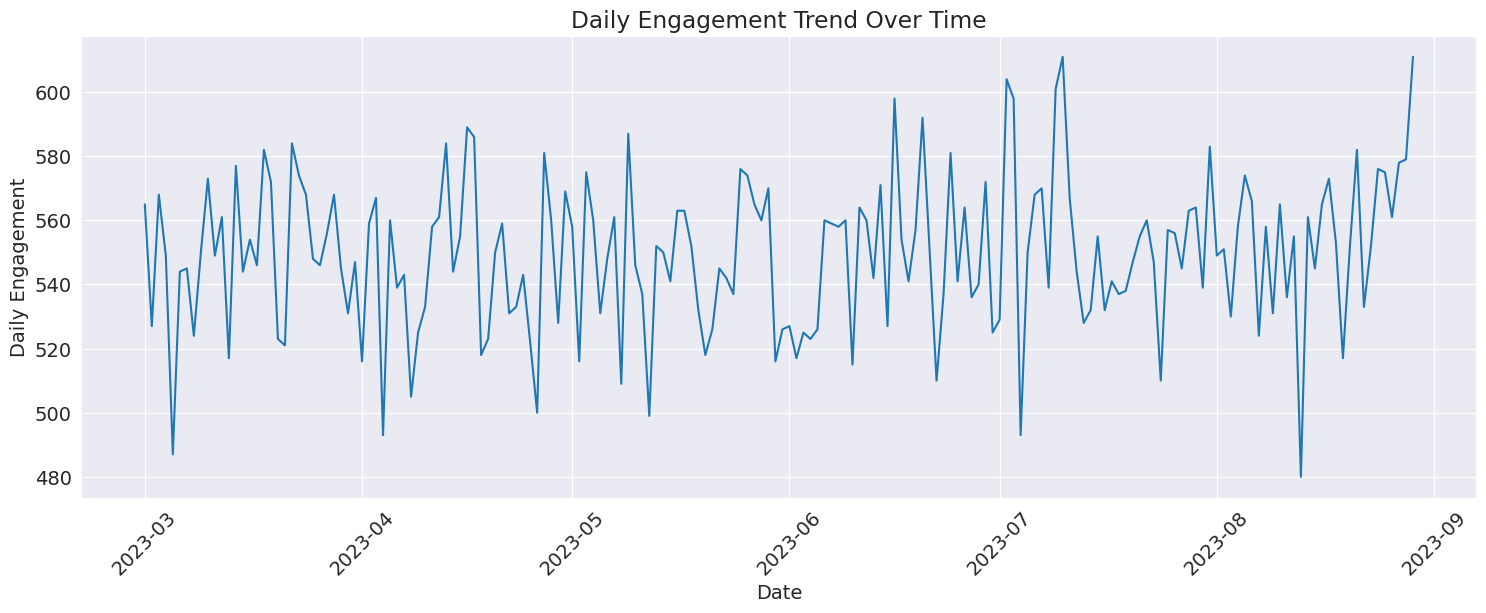

In [17]:
# Visualization: Plot the daily engagement trend over time
plt.plot(daily_engagement['date'], daily_engagement['daily_engagement'], linestyle='-')
plt.title('Daily Engagement Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Engagement')
plt.xticks(rotation=45)
plt.show()

Note: To Calculate Daily Engagement: I had Grouped the data by date and count the daily interactions.

-- For the daily engagement trend plot over time.

Here's a breakdown of conclusions made from the Visualization:

**Overall Trend:**
The overall trend in daily engagement exhibits fluctuations over time, characterized by significant spikes and dips.


### Analyzing Monthly Engagement Pattern
To identify overall patterns in user engagement, including peak and off-peak months.

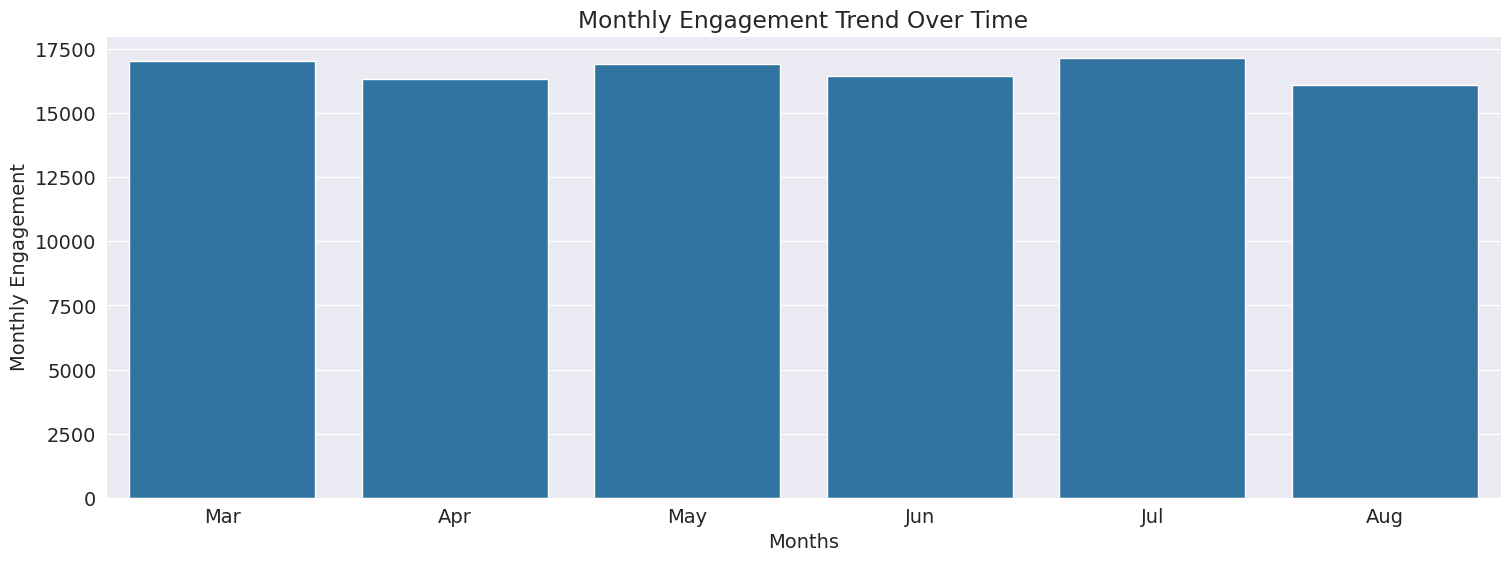

In [18]:
monthly_engagement = cleaned_data.groupby('month').size().reset_index(name='monthly_engagement')
# Visualization: Plot the daily engagement trend over time
sns.barplot(x = monthly_engagement['month'], y = monthly_engagement['monthly_engagement'])
plt.title('Monthly Engagement Trend Over Time')
plt.xlabel('Months')
plt.ylabel('Monthly Engagement')
plt.xticks(range(6), ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])
plt.show()

-- For the monthly engagement trend plot over time.

Here's a breakdown of conclusions made from the Visualization:

**Overall Trend**:
The overall trend in monthly engagement exhibits slight fluctuations over time, but the bars are of comparible lengths.

### Analyzing Weekly Engagement Patterns

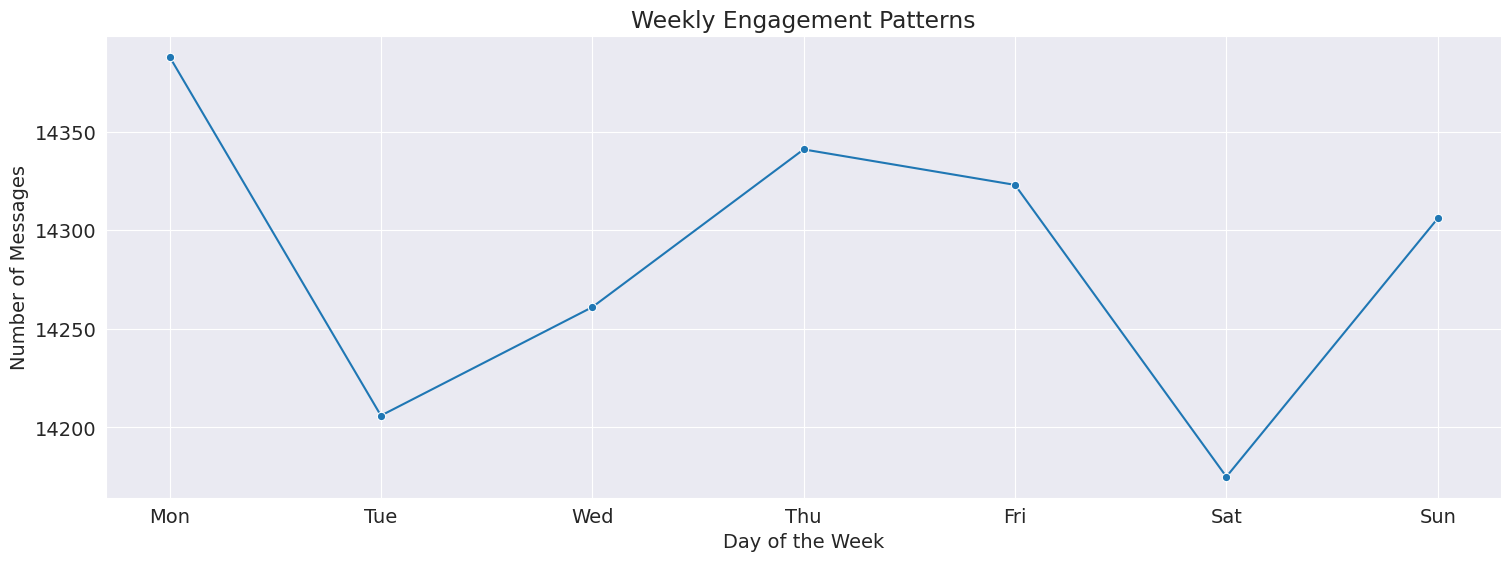

In [19]:
weekly_engagement = cleaned_data.groupby('day_of_week').size().reset_index(name='weekly_engagement')  # Group data by day of the week and count messages

# Visualization: Examine weekly engagement patterns through a line chart
sns.lineplot(x='day_of_week', y='weekly_engagement', data=weekly_engagement, marker='o')
plt.title('Weekly Engagement Patterns')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Messages')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

Note: To Calculate Weekly Engagement: I had Grouped the data by day_of_week to get the count of interactions.

-- For the weekly engagement trend plot over time.

Here's a breakdown of conclusions made from the Visualization:

* **Higher Engagement Days**:
Monday, Thursday, and Sunday exhibit better engagement.

* **Moderate Engagement Days**:
Wednesday and Friday have moderate engagement.

* **Lowest Engagement Day**:
Tuesday and Saturday has the least number of engagements.

### Average Weekly Call Duration

In [20]:
# Using `.pivot_table` for weekly analysis between "industry", "product" and 'call_duration'
cleaned_data.pivot_table(index=["industry",	"product"], values='call_duration', aggfunc='mean')

call_duration
industry      product                       
Education     Analytics Basic      39.888983
              Analytics Pro        40.009833
              CRM Basic            40.358546
              CRM Pro              39.710681
              ERP Enterprise       39.510448
              ERP Lite             39.488594
              Security Suite       39.944770
Finance       Analytics Basic      40.069374
              Analytics Pro        40.284577
              CRM Basic            39.558023
              CRM Pro              40.228145
              ERP Enterprise       40.182530
              ERP Lite             39.708505
              Security Suite       40.478243
Healthcare    Analytics Basic      39.891628
              Analytics Pro        39.758502
              CRM Basic            40.069767
              CRM Pro              40.113808
              ERP Enterprise       40.447912
              ERP Lite             40.097436
              Security Suite       39.699915
Manufacturing Analytics Basic      39.812947
              Analytics Pro        40.127902
              CRM Basic            39.469362
              CRM Pro              40.244923
              ERP Enterprise       39.536109
              ERP Lite             39.640472
              Security Suite       40.686042
Retail        Analytics Basic      39.837237
              Analytics Pro        39.800333
              CRM Basic            39.947613
              CRM Pro              40.048872
              ERP Enterprise       39.867356
              ERP Lite             40.012500
              Security Suite       39.458350
Technology    Analytics Basic      40.247303
              Analytics Pro        40.378084
              CRM Basic            40.208496
              CRM Pro              39.705759
              ERP Enterprise       39.911960
              ERP Lite             40.066831
              Security Suite       40.177637

**Conclusions**:

*  The weekly `call_duration` lies around approximately 40 mins, across all the industries and products.

### Isssues Raised and Call Duration Correlation

In [21]:
# Using `corr()` function to find the correlation between 'call_duration' and 'issues_raised'
correlation = cleaned_data['call_duration'].corr(cleaned_data['issues_raised'])
print(f"Correlation between Call Duration and Issues Raised: {correlation}")

Correlation between Call Duration and Issues Raised: 0.00013918500659464934


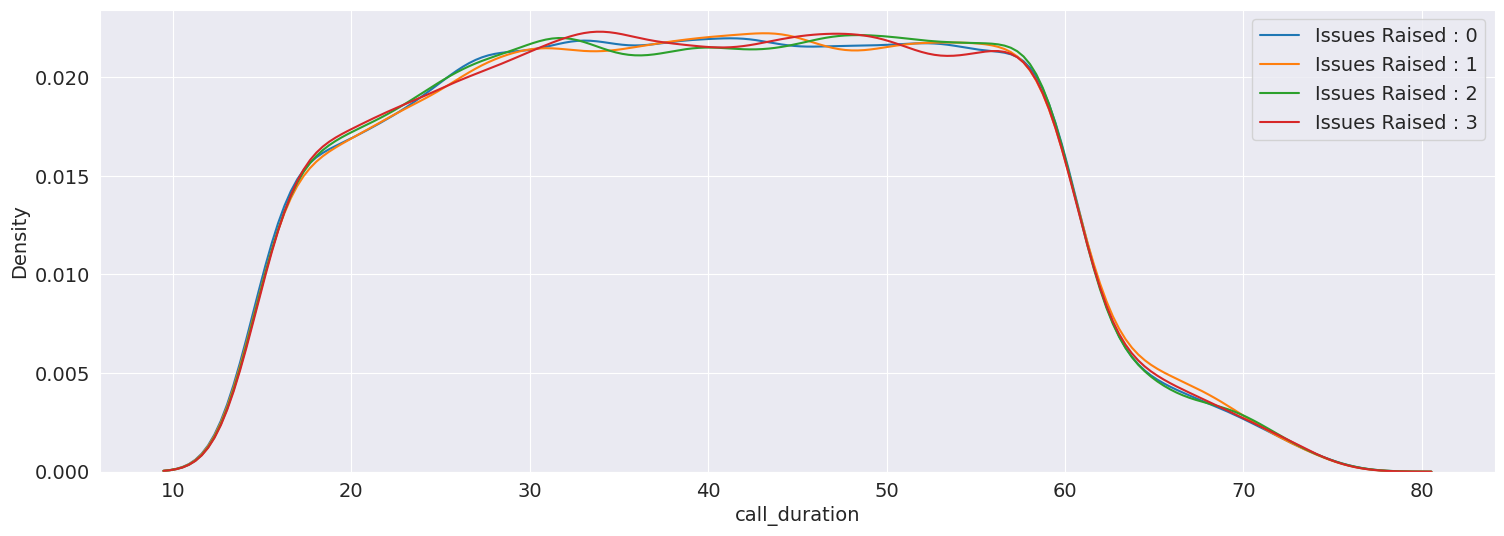

In [22]:
# Using a `distplot` to check the correlation between "issues_raised" and "call_duration"
sns.distplot(cleaned_data[cleaned_data['issues_raised'] == 0]['call_duration'],hist=False, label="Issues Raised : 0")
sns.distplot(cleaned_data[cleaned_data['issues_raised'] == 1]['call_duration'],hist=False, label="Issues Raised : 1")
sns.distplot(cleaned_data[cleaned_data['issues_raised'] == 2]['call_duration'],hist=False, label="Issues Raised : 2")
sns.distplot(cleaned_data[cleaned_data['issues_raised'] == 3]['call_duration'],hist=False, label="Issues Raised : 3")
# Adding legend
plt.legend()
xlabel='Customer Satisfaction',
ylabel='Density'
# Display the plot
plt.show()

**Conclusions**:

*  Most calls are between 20 and 60 minutes, with a sharp decline in density for durations below 20 minutes and above 60 minutes.

* The average call duration is close to 40 minutes,  This aligns with the earlier data that showed a median call duration of 40 minutes.

* The Uniform `call_duration` Distribution across the different levels of issues_raised (0, 1, 2, 3) are quite similar. The correlation of 0.000139 indicates almost no relationship between call duration and the number of issues raised.

### Sentiment Analysis

<Axes: xlabel='sentiment_score', ylabel='Count'>

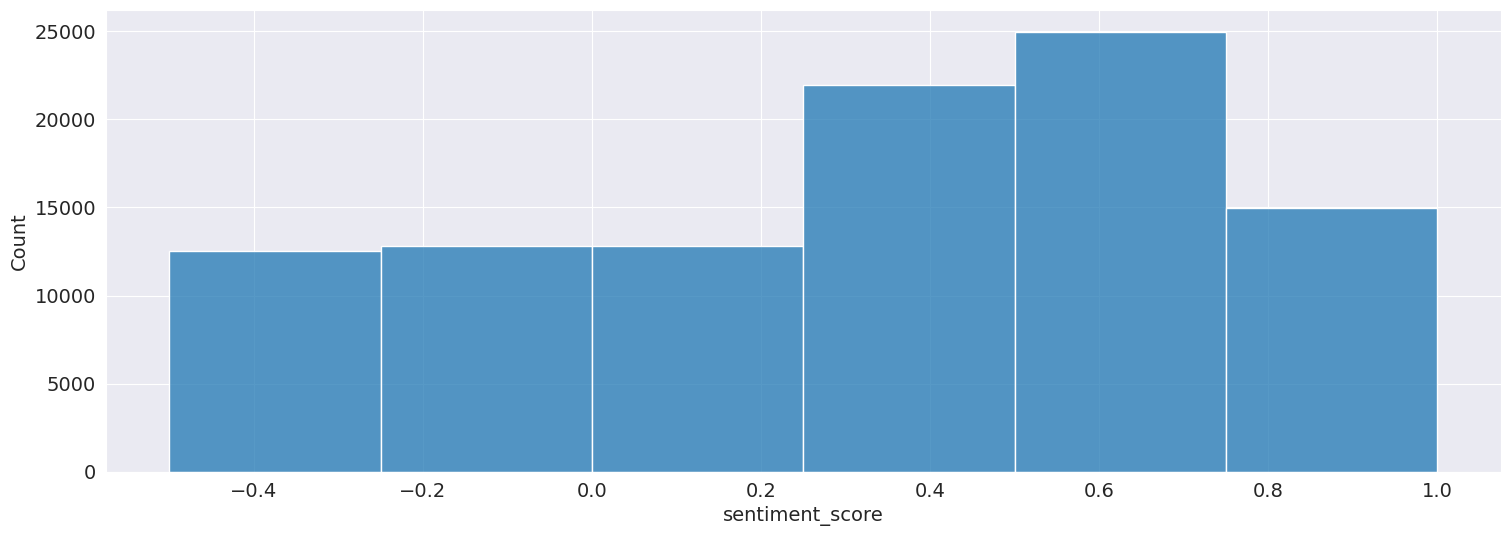

In [23]:
# Using a histplot to understand the distribution of `sentiment_score`
sns.histplot(cleaned_data['sentiment_score'], bins=6)

**Conclusion**:

The `histplot` suggests that the data is **left skewed data**. With a sentiment score mean of 0.31763. The sentiment score indicates a slightly positive customer sentiment overall.

### Industry and Churn Correlation:

In [24]:
# Using a crosstab to check the correlation between "churn_risk" and "industry"
pd.crosstab(cleaned_data['churn_risk'],cleaned_data['industry'], values=cleaned_data['call_id'], aggfunc='count')

industry,Education,Finance,Healthcare,Manufacturing,Retail,Technology
churn_risk,,,,,,
High,6450,2576,2459,6329,6404,6336
Low,3829,11673,11586,3880,3934,3947
Medium,6346,2518,2486,6518,6401,6328


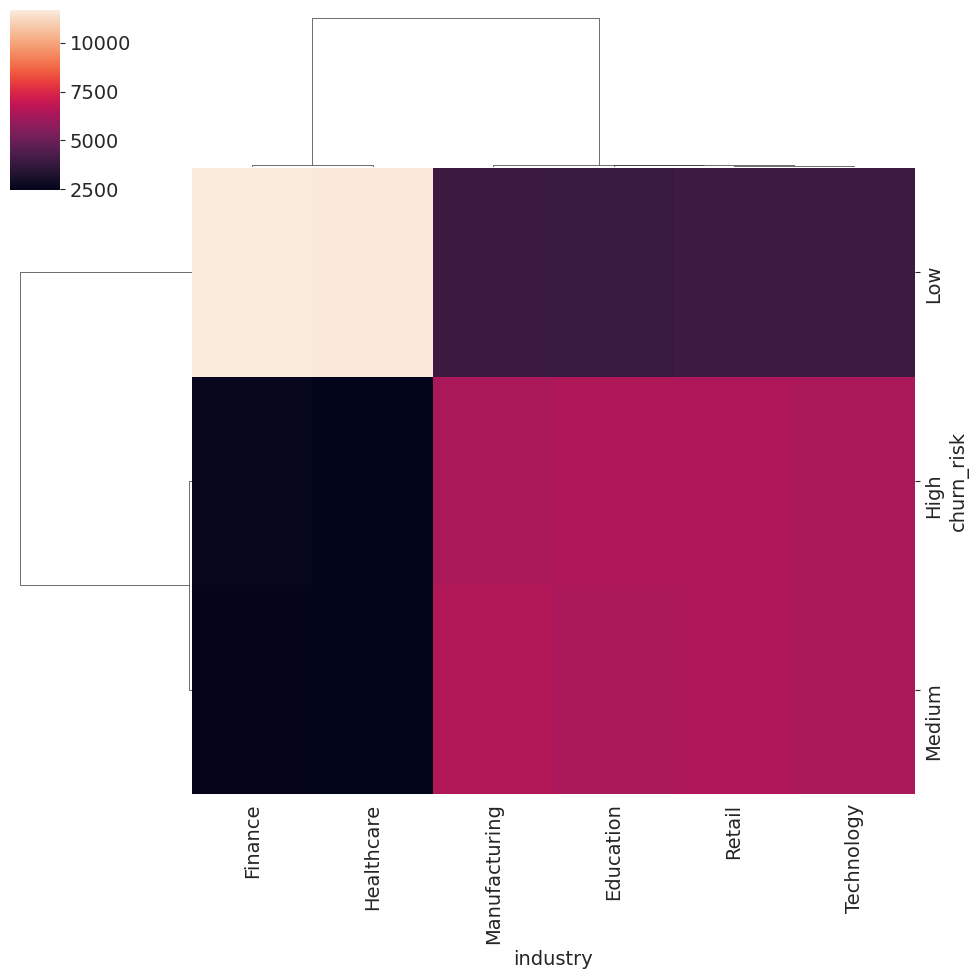

In [25]:
# Using a cluster map to check the correlation between "churn_risk" and "industry"
sns.clustermap(pd.crosstab(cleaned_data['churn_risk'],cleaned_data['industry'], values=cleaned_data['call_id'], aggfunc='count'))

**Conclusion**:

The **Education**, **Manufacturing**, **Retail**, and **Technology** industries have notably higher numbers of customers in the High churn risk category compared to **Finance** and **Healthcare**.


This reveals that there could be specific platform bais or features issues that are leading to higher churn rates in certain industries.

### Product and Churn Correlation:

In [26]:
# Using a crosstab to check the correlation between "churn_risk" and "product"
pd.crosstab(cleaned_data['churn_risk'],cleaned_data['product'], values=cleaned_data['call_id'], aggfunc='count')

product,Analytics Basic,Analytics Pro,CRM Basic,CRM Pro,ERP Enterprise,ERP Lite,Security Suite
churn_risk,,,,,,,
High,4335,4337,4401,4401,4319,4388,4373
Low,5611,5439,5520,5500,5558,5614,5607
Medium,4312,4431,4340,4398,4350,4386,4380


**Conclusion**:

This correlation between the product type and churn risk do not suggest any overwhelming majority using certain products with higher likelihood of being in the High churn risk category.


### Impact of Follow-up on Churn:

<Axes: xlabel='followup_scheduled', ylabel='churn_risk'>

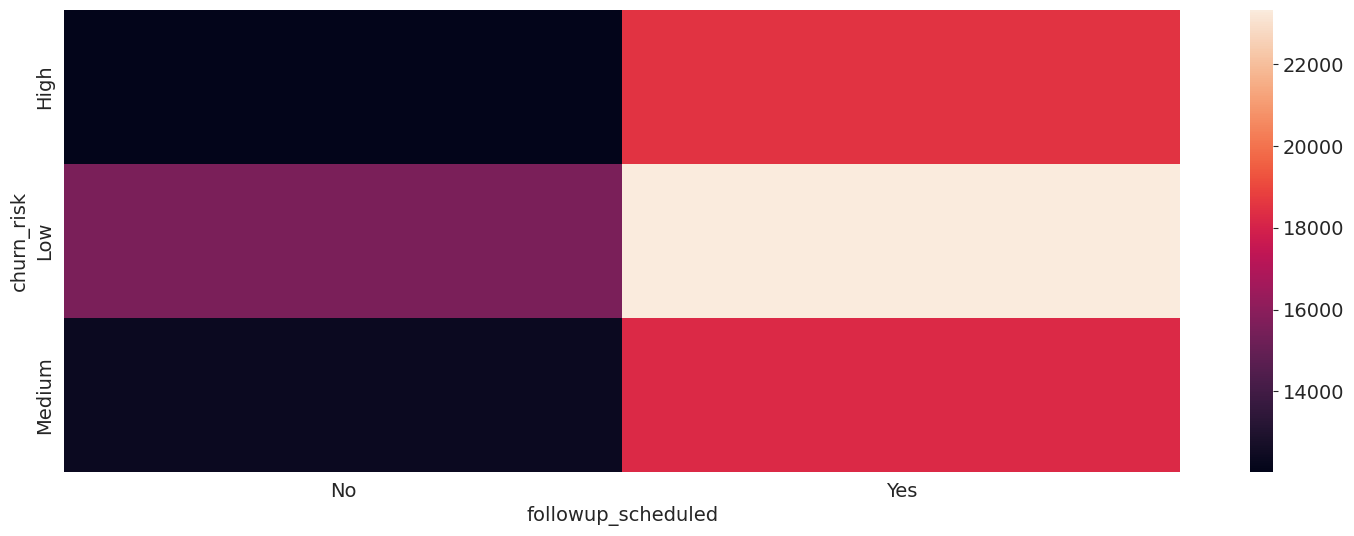

In [27]:
# Using a heat map to check the correlation between "churn_risk" and "followup_scheduled"
sns.heatmap(pd.crosstab(cleaned_data['churn_risk'],cleaned_data['followup_scheduled'], values=cleaned_data['call_id'], aggfunc='count'))

**Conclusion**:

Significant number of customers with `follow-ups scheduled` fall into the Low churn risk category (23,322), not only this even customers who have high risk (18515) to churn, are also willing to schedule the follow-ups.

This suggests that customers with follow-ups scheduled are less likely to churn.

### Competitor Mentioned:



In [28]:
# Using a crosstab to check the correlation between "churn_risk" and "competitor_mentioned"
pd.crosstab(cleaned_data['churn_risk'],cleaned_data['competitor_mentioned'], values=cleaned_data['call_id'], aggfunc='count')

competitor_mentioned,No,Yes
churn_risk,,
High,15612,14942
Low,38849,0
Medium,15611,14986


**Conclusion**:

About 30% of customers mention a competitor during interactions, out of which 15% are more likely to churn indicating potential vulnerability to churn if not addressed the later half.

### Upsell Success and Churn

In [29]:
# Using a crosstab to check the correlation between "churn_risk" and "upsell_opportunity"
pd.crosstab(cleaned_data['churn_risk'],cleaned_data['upsell_opportunity'], values=cleaned_data['call_id'], aggfunc='count')

upsell_opportunity,High,Low,Medium
churn_risk,,,
High,4425,10870,15259
Low,5509,13804,19536
Medium,4400,10863,15334


**Conclusion**:

The relationship between upsell opportunities and churn risk suggest that the customers with higher upsell opportunities tend to have lower churn rates. Simultaneously, customers with low churn_risk are least interested in upselling_opportunities.



### Chi-Square Test

Since the crosstab table output is not convincing enough. I'll be using  Chi-square test χ² of Independences.

This test is a nonparametric hypothesis test, used to determine if there is a significant association between two categorical variables i.e,  "churn_risk" and "upsell_opportunity".

In [30]:
import scipy.stats as stats

In [31]:
# Create contingency table
contingency_table = pd.crosstab(cleaned_data['churn_risk'], cleaned_data['upsell_opportunity'])

# Perform chi-square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p}")

# Determine statistical significance
alpha = 0.05
if p < alpha:
    print("There is a statistically significant difference in upsell_opportunity between churn_risk.")
else:
    print("There is no statistically significant difference in upsell_opportunity between churn_risk.")

Chi-square statistic: 1.59
P-value: 0.8109945897338096
There is no statistically significant difference in upsell_opportunity between churn_risk.


There is no strong or statistically significant correlation between the churn_risk and upsell_opportunities, indicating that upsell opportunities are distributed relatively evenly across customers, regardless of their churn risk.

## Multicollinearity Between Numeric Columns

Perfect multicollinearity occurs when one predictor variable is a perfect linear function of one or more other predictor variables. It can lead to unstable estimates of the regression coefficients.

-- Multicollinearity can be detected using techniques like variance inflation factor (VIF) or correlation matrices.



### Method 1: Variance Inflation Factor (VIF)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
selected_columns = cleaned_data[["call_duration",	"sentiment_score",	"issues_raised",	"feature_requests"]]

In [34]:
# Calculating VIF for each column
vif = pd.DataFrame()
vif["Feature"] = selected_columns.columns
vif["VIF"] = [variance_inflation_factor(selected_columns.values, i) for i in range(selected_columns.shape[1])]

print(vif)

            Feature       VIF
0     call_duration  3.579808
1   sentiment_score  1.543902
2     issues_raised  2.426274
3  feature_requests  2.423603


Typically, a VIF value greater than 5 or 10 indicates high multicollinearity, suggesting that the feature may be redundant in the presence of other features.

In this case, no column have VIF values close to the threshold, indicating little or less multicollinearity.


### Method 2: Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

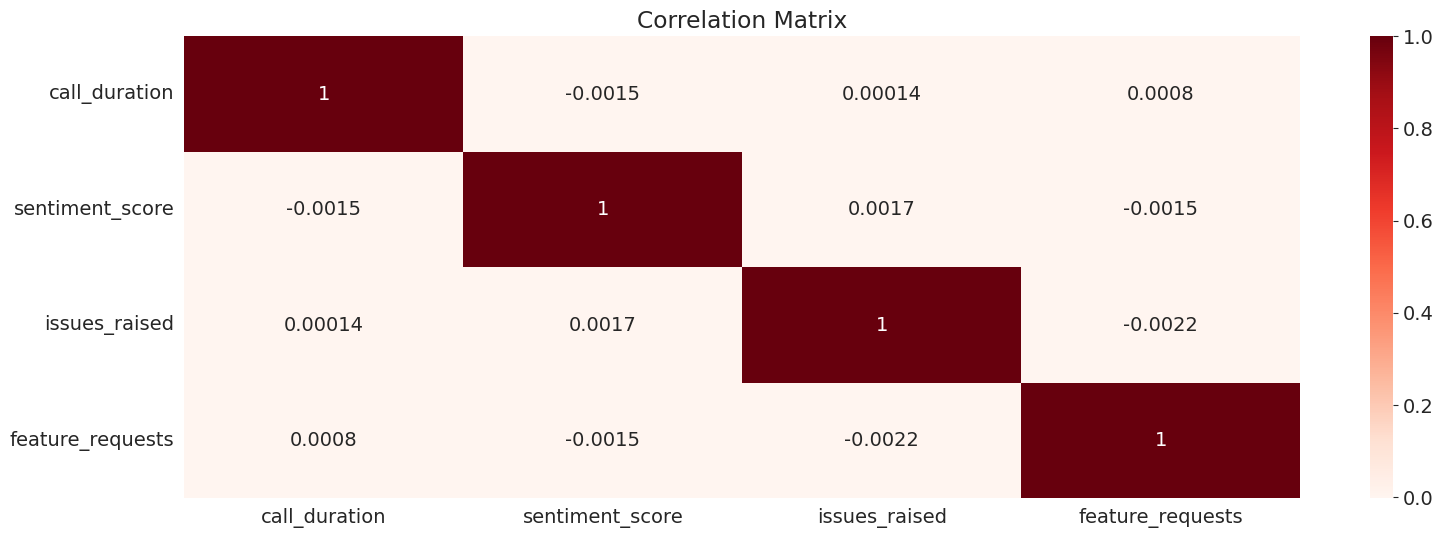

In [35]:
# Using `.corr()` to find correlation between the numerical columns
sns.heatmap(selected_columns.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

The heatmap suggests that there is no direct correlation between the numeric columns of this dataset.

### Final Conclusion- The top factors influencing customer engagement and potential churn:

* **Upsell Opportunity and Churn Risk**: The analysis indicates that customers with higher upsell opportunities tend to have lower churn risks. However, the chi-square test revealed no statistically significant difference between churn risk and upsell opportunities.

* **Churn Risk by Industry**: Industries such as Education, Manufacturing, Retail, and Technology show higher churn risks compared to Finance and Healthcare, suggesting potential issues or platform biases in these sectors.

* **Follow-up Impact on Churn**: A significant majority (about 60%) of customers have a follow-up scheduled, which could be a key factor in retaining customers and reducing churn.

* **Competitor Mention and Churn**: Around 15% of customers who mention competitors are more likely to churn, highlighting the need for competitive analysis and better retention strategies.




### Recommendations:

* The engagement patterns suggest that to schedule important customer communications and upsell offers on days with higher engagement, (such as Mondays and Thursdays).
* Scheduling follow-ups correlates with a lower churn risk, indicating that proactive customer engagement could reduce churn rates.
* Strategically defining upselling opportunities to the customers with lower churn risks, would be beneficial for the business for reducing churn and increasing customer lifetime value.
* Focus more on industry-specific strategies (such as product features or latency, etc.) for Education, Manufacturing, Retail, and Technology to address the higher churn risk in these sectors.
* Not to forget, competitor monitoring is a must to implement and develop countermeasures to retain at-risk customers.







### Additionally

According to above data, I want to build a classifier model that can classify the data into the 3 different categories of `churn_risk` i.e., High, Low and Medium.

In [36]:
final_data = cleaned_data[['customer_size', 'industry',
       'product', 'call_duration',  'day_of_week', 'sentiment_score', 'followup_scheduled',
       'issues_raised', 'feature_requests', 'competitor_mentioned',
       'upsell_opportunity', 'churn_risk']]

In [37]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   customer_size         100000 non-null  category
 1   industry              100000 non-null  category
 2   product               100000 non-null  category
 3   call_duration         100000 non-null  int8    
 4   day_of_week           100000 non-null  int32   
 5   sentiment_score       100000 non-null  float32 
 6   followup_scheduled    100000 non-null  category
 7   issues_raised         100000 non-null  int8    
 8   feature_requests      100000 non-null  int8    
 9   competitor_mentioned  100000 non-null  category
 10  upsell_opportunity    100000 non-null  category
 11  churn_risk            100000 non-null  category
dtypes: category(7), float32(1), int32(1), int8(3)
memory usage: 1.7 MB


### Train/ Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train_input, test_input, train_target, test_target = train_test_split(final_data.drop(columns=["churn_risk"]), final_data["churn_risk"], test_size=0.3, random_state=42)

In [40]:
print("input_train_df.shape", train_input.shape)
print("input_test_df.shape", test_input.shape)
print("output_train_df.shape", train_target.shape)
print("output_test_df.shape", test_target.shape)

input_train_df.shape (70000, 11)
input_test_df.shape (30000, 11)
output_train_df.shape (70000,)
output_test_df.shape (30000,)


In [41]:
train_input.columns

Index(['customer_size', 'industry', 'product', 'call_duration', 'day_of_week',
       'sentiment_score', 'followup_scheduled', 'issues_raised',
       'feature_requests', 'competitor_mentioned', 'upsell_opportunity'],
      dtype='object')

### Feature Engineering

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [43]:
trf2 = ColumnTransformer(transformers=[
    # One Hot Encoding
    ("ohe_industry", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop="first"),[1]),
    ("ohe_product", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop="first"),[2]),
    # *Handle unknown categories with OneHotEncoder by encoding them as zeros*

    # Ordinal Encoding
    ("oe_customer_size", OrdinalEncoder(categories=[['Large', 'Medium', 'Small']]), [0]),
    ("oe_followup_scheduled", OrdinalEncoder(categories=[['Yes', 'No']]), [6]),
    ("oe_competitor_mentioned", OrdinalEncoder(categories=[['Yes', 'No']]), [9]),
    ("oe_upsell_opportunity", OrdinalEncoder(categories=[['High', 'Medium', 'Low']]), [10]),

],remainder="passthrough")

In [44]:
trf2.get_params(deep=True)

{'n_jobs': None,
 'remainder': 'passthrough',
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('ohe_industry',
   OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
   [1]),
  ('ohe_product',
   OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
   [2]),
  ('oe_customer_size',
   OrdinalEncoder(categories=[['Large', 'Medium', 'Small']]),
   [0]),
  ('oe_followup_scheduled', OrdinalEncoder(categories=[['Yes', 'No']]), [6]),
  ('oe_competitor_mentioned', OrdinalEncoder(categories=[['Yes', 'No']]), [9]),
  ('oe_upsell_opportunity',
   OrdinalEncoder(categories=[['High', 'Medium', 'Low']]),
   [10])],
 'verbose': False,
 'verbose_feature_names_out': True,
 'ohe_industry': OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
 'ohe_product': OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
 'oe_customer_size': OrdinalEncoder(categories=[['Large', 'Medium', 'Small']]),
 'o

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
# Scaling
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,20))
])

In [47]:
# Label Encoder (for Categorical Targets Only)
le = LabelEncoder()
train_target_encoded = le.fit_transform(train_target)
test_target_encoded = le.transform(test_target)

### Model Building

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [49]:
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    """
    Train multiple models and evaluate their performance.

    Parameters:
    models (dict): A dictionary where keys are model names and values are the pipelines.
    X_train: Training input data.
    y_train: Training target data.
    X_test: Test input data.
    y_test: Test target data.

    Returns:
    pd.DataFrame: A DataFrame containing the model name, accuracy, confusion matrix, and precision for each model.
    """
    results = []

    for model_name, pipeline in models.items():
        # Train the model
        pipeline.fit(X_train, y_train)

        # Predict on test data
        y_pred = pipeline.predict(X_test)

        # Evaluate model performance
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')

        # Store results in a dictionary
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Confusion Matrix': conf_matrix,
            'Precision': precision
        })

    # Convert the results to a DataFrame for easy viewing
    results_df = pd.DataFrame(results)

    return results_df

### Creating Pipeline

In [50]:
from sklearn.pipeline import Pipeline

In [51]:
pipe_lrc = Pipeline([
    ('trf2', trf2),
    ('trf3', trf3),
    ('clf', LogisticRegression(solver='liblinear', random_state=42))
])

pipe_dtc = Pipeline([
    ('trf2', trf2),
    ('trf3', trf3),
    ('clf', DecisionTreeClassifier(max_depth = 5, random_state= 42))
])

pipe_rfc = Pipeline([
    ('trf2', trf2),
    ('trf3', trf3),
    ('clf', RandomForestClassifier(n_estimators = 50, random_state = 42, max_depth= 3, n_jobs=-1))
])

pipe_xgb = Pipeline([
    ('trf2', trf2),
    ('trf3', trf3),
    ('clf', XGBClassifier(random_state=42, n_jobs=-1, n_estimators=100, max_depth=4))
])

# Define your models in a dictionary
models = {
    'Logistic Regression': pipe_lrc,
    'Decision Tree Classifier': pipe_dtc,
    'Random Forest Classifer': pipe_rfc,
    'XGBoost Classifier': pipe_xgb
}


In [52]:
# Assuming train_input, train_target_encoded, test_input, and test_target_encoded are defined
results_df = train_and_evaluate(models, train_input, train_target_encoded, test_input, test_target_encoded)

# Print the results
print(results_df[['Model', 'Accuracy', 'Precision']])

                      Model  Accuracy  Precision
0       Logistic Regression  0.537433   0.518969
1  Decision Tree Classifier  0.540367   0.602477
2   Random Forest Classifer  0.524400   0.502634
3        XGBoost Classifier  0.539700   0.535814


### HyperParameter Tuning

Finding optimal tuning parameters for the entire pipeline

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
pipe_dtc = Pipeline([
    ('trf2', trf2),
    ('trf3', trf3),
    ('clf', DecisionTreeClassifier(random_state= 42))
])

In [55]:
# Define the hyperparameter grid to search
param_grid = {
    'clf__criterion': ['gini', 'entropy'],              # Criterion for splitting
    'clf__max_depth': [3, 4, 5],                        # Maximum depth of the tree
    'clf__min_samples_split': [2, 3, 5],                # Minimum number of samples required to split a node
    'clf__min_samples_leaf': [1, 2, 3],                 # Minimum number of samples required at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipe_dtc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit GridSearchCV on the training data
grid_search.fit(train_input, train_target_encoded)

# Get the best model from the grid search
best_dtc = grid_search.best_estimator_

# Print the best parameters and the corresponding accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'clf__criterion': 'gini', 'clf__max_depth': 4, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best Cross-Validation Accuracy: 0.5405142857142857


In [56]:
# Predict using the best model on the test set
test_pred = best_dtc.predict(test_input)

# Calculate accuracy and precision for the test set
accuracy = accuracy_score(test_target_encoded, test_pred)
precision = precision_score(test_target_encoded, test_pred, average='weighted')

print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")

# Display the confusion matrix
conf_matrix = confusion_matrix(test_target_encoded, test_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Test Accuracy: 0.5393666666666667
Test Precision: 0.5212463248419781
Confusion Matrix:
[[ 1556  4582  3002]
 [   51 11593     0]
 [ 1537  4647  3032]]


Confusion Matrix Analysis:

* Class High (1556 correct, 7584 incorrect).
* Class Medium (11593 correct, 51 incorrect)
* Class Low (3032 correct, 6184 incorrect)

Since the class distribution of `churn_risk` is fairly balanced, the low accuracy score is maybe because the data is less granular.

Because of which, the model is not able to differentiate between the underlying features leading to high rate of misclassification, as seen in the confusion matrix.

If there will be more features in data, that can show the more details about the churn_risk, then the model could performed better after little feature engineering.


`This notebook is written by Nikita Prasad.`